In [1]:
using Plots
using Revise
includet("Kagome_Sp_Script.jl")
includet("Kagome_Mb_Script.jl")

In [2]:
Nx = 2; Ny = 3
t1 = -1; L1 = 0.28; t2 = 0.3; L2 = 0.2;
PN = 3
U = 100

100

In [3]:
sp_op = get_SP_H(Nx, Ny, t1, L1, t2, L2);

In [4]:
HC_Basis_MB = get_Fermionic_MB_basis(PN);

In [5]:
HC_Hamiltonian_MB = Kagome_Hard_Core(HC_Basis_MB, Nx, Ny, sp_op)
E0 = real(eigenenergies(dense(HC_Hamiltonian_MB)));

Filling fraction for topological dejeneracy:
\begin{align}
\frac{Particle Number}{N_{cell}} = \frac{Particle Number}{N_xN_y}
\end{align}

In [6]:
println("Number of Particle= ",PN)
println("Total Number of Unit-Cell in Each Direction= ",Nx*Ny)
println("Filling Fraction= ",PN/(Nx*Ny))

Number of Particle= 3
Total Number of Unit-Cell in Each Direction= 6
Filling Fraction= 0.5


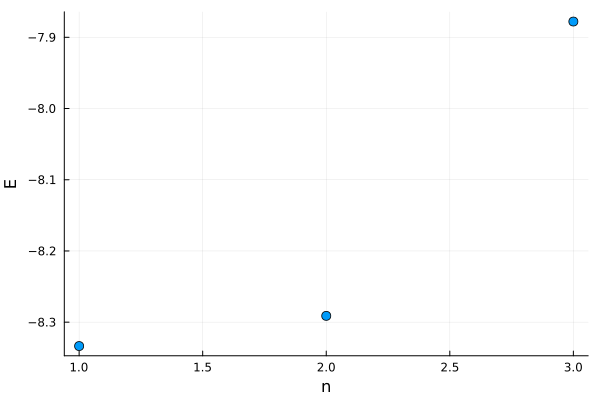

In [7]:
scatter(E0[1:3], seriestype = :scatter, markersize = 5, legend=false, xlabel="n", ylabel="E")

#### Topological Flat Bands

\begin{equation}
N_d=N_{\phi}-N/\nu_0  \quad \text{(If gs of sp is a flat band then }N_{d}=1), \quad \nu_0=1/2 \rightarrow N_d=N_{\phi}-2N=1 \rightarrow N_{\phi}=2N+1
\end{equation}
Number of gs degeneracy given as:
\begin{equation}
D(N,N_d,N_{\phi}) = \frac{(N_d+N-1)!}{N_d!(N-1)!}\frac{N_{\phi}}{N} \rightarrow D=N_{\phi}=2N+1, \quad N_{\phi}=N_1N_2\phi, \quad \phi\text{:Magnetic flux per plaquet}
\end{equation}
where $N_{\phi}$ is equal to number of unit-cell. So, physical filling fraction $N/N_{\phi}=\frac{N}{2N+1}$. Let's say total number of particles $N=4$ and total number of unit-cell is $N_xN_y=3X3$. Therefore we wait to get $D=N_{\phi}=2*4+1=9$ ground state degeneracy.

### Bose-Hubbard

\begin{equation}
H = -t \sum_{<ij>} \left( b_i^\dagger b_j + h.c. \right) + U/2 \sum_i n_i \left( n_i -1\right)
\end{equation}

In [8]:
MB_Hamiltonian = Kagome_Finite_U(Nx,Ny,t1,L1,t2,L2,PN,U)
E1 = eigenenergies(dense(MB_Hamiltonian));

In [9]:
println("Amplitude of Lattice Potantiel=",U)
println("Number of Particle=",PN)
println("Total Number of Unit-Cell in Each Direction=",Nx*Ny)
println("Filling Fraction=",PN/(Nx*Ny))

Amplitude of Lattice Potantiel=100
Number of Particle=3
Total Number of Unit-Cell in Each Direction=6
Filling Fraction=0.5


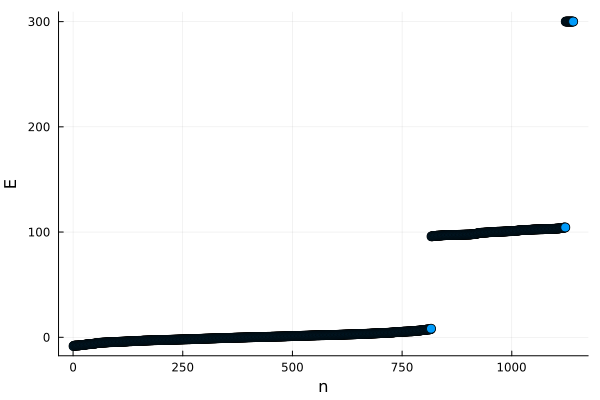

In [10]:
scatter(E1, seriestype = :scatter, markersize = 5, legend=false, xlabel="n", ylabel="E")

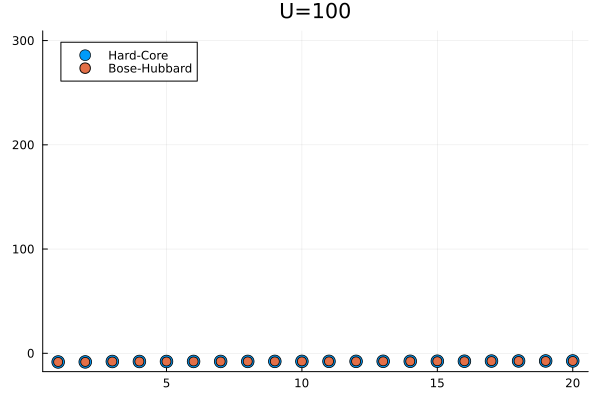

In [11]:
# U yeterince büyük iken bose-hubbard enerjileri, hard-core enerjilerine yaklaşır
plot(1:length(E0[1:20]), E0, seriestype = :scatter, markersize = 7,label="Hard-Core")
plot!(1:length(E1[1:20]), E1, seriestype = :scatter, markersize = 5, label="Bose-Hubbard", legend=:topleft)
title!("U=$U")